In [18]:
from build.sabre import CouplingCircuit
from build.sabre import Backend as Backend_cpp
from build.sabre import Model as Model_cpp
from build.sabre import SabreLayout as SabreLayout_cpp 
from build.sabre import SabreRouting as SabreRouting_cpp
from build.sabre import DAGCircuit as DAGCircuit_cpp
from build.sabre import CouplingCircuit as CouplingCircuit_cpp
from build.sabre import InstructionNode as InstructionNode_cpp
from build.sabre import Layout as Layout_cpp

from test_cpp import *
from utils import *

import numpy as np
import time

import sys
sys.path.append("/Users/air/workspace/qusteed")
from qusteed.dag.dag_circuit import DAGCircuit
from qusteed.passes.mapping.routing.sabre_routing import SabreRouting
from qusteed.passes.model import Model
from qusteed.backends.backend import Backend
from qusteed.passes.datadict import DataDict
from qusteed.dag.circuit_dag  import circuit_to_dag, dag_to_circuit, draw_dag
from qusteed.dag.instruction_node import InstructionNode 
from qusteed.graph.couplinggraph import CouplingGraph
from qusteed.utils.random_circuit import RandomCircuit 


from qusteed.compiler.transpiler import Transpiler



%load_ext autoreload
%autoreload 2



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# qc, dag = test_dag()
# qc.plot_circuit()
# qc_ = cppDag_to_QuantumCircuit(dag)
# qc_.plot_circuit()

In [45]:
c_circuit, c_circuit_cpp = test_coupling()

model = get_preset_model()
qc = get_random_qc()

# dag = circuit_to_dag(qc)
# dag_cpp = dag_to_cppDag(dag)

dag_cpp = QuantumCircuit_to_cppDag(qc)


Backend Created
Model with backend created


In [46]:
sabre_layout = SabreLayout_cpp(c_circuit_cpp)
p_dag = sabre_layout.run(dag_cpp)

qc_cpp = cppDag_to_QuantumCircuit(p_dag)


Run sabre layout !
{1: 3, 0: 2, 3: 1, 2: 0}
{0: 0, 3: 1, 1: 2, 2: 3}
{1: 3, 0: 2, 3: 1, 2: 0}
{0: 0, 3: 1, 1: 2, 2: 3}
{1: 3, 0: 2, 3: 1, 2: 0}
{0: 0, 3: 1, 1: 2, 2: 3}


In [ ]:
# qc.plot_circuit()
# qc_cpp.plot_circuit()

array([ 0.34814173+0.08623773j,  0.21570965+0.40450444j,
        0.20773387+0.03628583j,  0.09994771+0.10169373j,
        0.25772015+0.08547487j,  0.23771655+0.01331659j,
        0.29289347-0.15458113j,  0.02119989+0.03818782j,
       -0.18199891-0.12703344j, -0.15942981-0.21128294j,
        0.07000342-0.08234322j,  0.0213306 +0.0023432j ,
       -0.12860552+0.07866008j, -0.12505925-0.25526856j,
        0.2115127 +0.0837055j ,  0.00292861+0.26011665j])

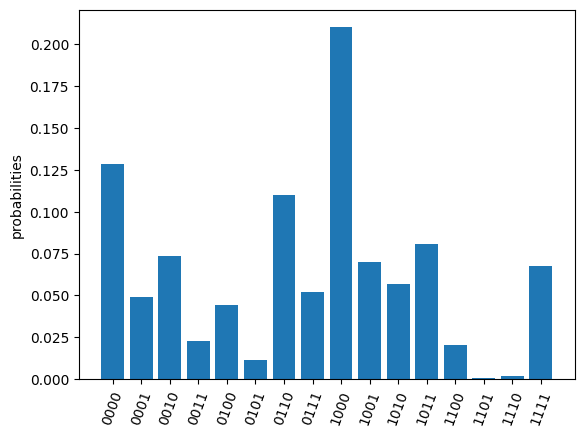

In [47]:
from quafu import simulate

simu_res = simulate(qc, output="probabilities")
simu_res.plot_probabilities()
simu_res = simulate(qc, output="state_vector")
simu_res.get_statevector()

array([ 0.34814173+0.08623773j,  0.25772015+0.08547487j,
       -0.18199891-0.12703344j, -0.12860552+0.07866008j,
        0.21570965+0.40450444j,  0.23771655+0.01331659j,
       -0.15942981-0.21128294j, -0.12505925-0.25526856j,
        0.20773387+0.03628583j,  0.29289347-0.15458113j,
        0.07000342-0.08234322j,  0.2115127 +0.0837055j ,
        0.09994771+0.10169373j,  0.02119989+0.03818782j,
        0.0213306 +0.0023432j ,  0.00292861+0.26011665j])

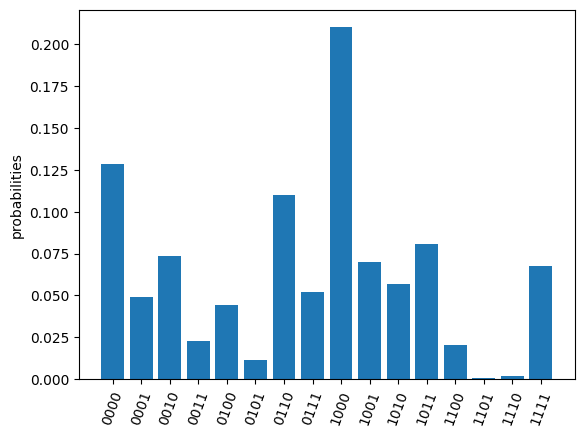

In [48]:
from quafu import simulate



cpp_simu_res = simulate(qc_cpp, output="probabilities")
cpp_simu_res.plot_probabilities()
cpp_simu_res = simulate(qc_cpp, output="state_vector")
cpp_simu_res.get_statevector()

---- python ----
python-time: 0.001950979232788086


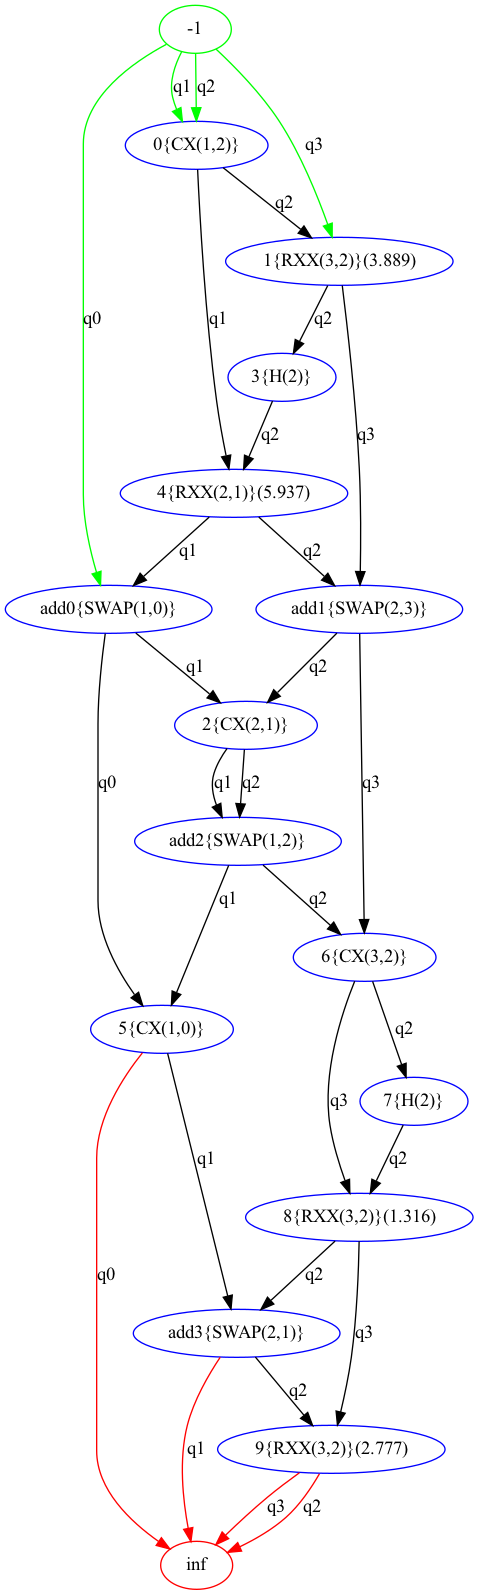

In [4]:
print("---- python ----")

sabre_routing = SabreRouting()
sabre_routing.modify_dag = True
sabre_routing.set_model(model)

st = time.time()
res = sabre_routing.run(dag)
print(f"python-time: {time.time()-st}")
draw_dag(res)


In [5]:
print("----  c++   ----")
model_cpp = Model_cpp() 
model_cpp.init_layout =  Layout_cpp(sabre_routing.model._layout["initial_layout"].v2p)
sabre_routing_cpp = SabreRouting_cpp(c_circuit_cpp)
sabre_routing_cpp.modify_dag = True
sabre_routing_cpp.set_model(model_cpp)
st = time.time()
mapped_dag_cpp = sabre_routing_cpp.run(dag_cpp)
print(f"cpp-time: {time.time()-st}")
# mapped_dag_cpp.draw_self()
# dag_cpp.print_self()

----  c++   ----
cpp-time: 0.00011610984802246094


In [7]:
mapped_dag_cpp.draw_self()
# res_cpp = cppDag_to_dag(mapped_dag_cpp)

-- drawing --


In [6]:
measures = [x for x in range(4)]
cbits = [x for x in range(4)]


qc = dag_to_circuit(res, 4)
qc.measure(measures,  cbits=cbits)


# qc_cpp = dag_to_circuit(res_cpp, 4)
qc_cpp = cppDag_to_QuantumCircuit(mapped_dag_cpp)
qc_cpp.measure(measures,  cbits=cbits)

In [ ]:
qc.plot_circuit()

In [8]:
from quafu import simulate



# simu_res = simulate(qc_cpp, output="")
# simu_res.plot_probabilities()
simu_res = simulate(qc_cpp, output="state_vector")
simu_res.get_statevector()

array([ 0.0739667 +0.08226583j, -0.36028188+0.2803293j ,
       -0.09660324-0.13094437j, -0.02640921+0.0468791j ,
        0.0739667 -0.08226583j,  0.36028188+0.2803293j ,
        0.09660324-0.13094437j, -0.02640921-0.0468791j ,
       -0.02242048+0.04241783j, -0.35331945-0.27132291j,
       -0.11958504+0.14871053j, -0.07527178-0.08465249j,
        0.02242048+0.04241783j, -0.35331945+0.27132291j,
       -0.11958504-0.14871053j,  0.07527178-0.08465249j])

In [ ]:
qc_cpp.plot_circuit()